In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [191]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [192]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


In [193]:
df.shape

(10000, 14)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [195]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype='object')

In [196]:
df.isna().sum()
df.dropna(inplace=True)

In [197]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [198]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [199]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography', 'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'exited'], dtype='object')

In [200]:
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography', 'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'exited'], dtype='object')

In [201]:
for col in df.columns:
  print(f"{col} : {df[col].unique()}")
  print('-'*200)

rownumber : [    1     2     3 ...  9998  9999 10000]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
customerid : [15634602 15647311 15619304 ... 15584532 15682355 15628319]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
surname : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
creditscore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 82

In [202]:
df.drop(columns=['rownumber','customerid','surname'],inplace=True)

In [203]:
for col in df.columns:
  print(f"{col} : {df[col].value_counts()}")
  print('-'*200)

Streaming output truncated to the last 5000 lines.
143538.510    1
77677.140     1
183717.940    1
92180.620     1
85891.020     1
10511.130     1
42050.240     1
110142.340    1
179269.790    1
90558.240     1
162022.470    1
66926.830     1
108891.300    1
137916.490    1
101139.300    1
112781.500    1
22299.270     1
65010.740     1
106892.910    1
185210.630    1
4035.460      1
177805.440    1
68831.720     1
114732.620    1
197283.200    1
85495.240     1
179485.960    1
17699.480     1
118490.800    1
133292.940    1
58170.240     1
107137.300    1
145071.330    1
71811.900     1
92223.590     1
78065.900     1
105760.010    1
194700.810    1
158974.450    1
198182.730    1
141404.070    1
4175.680      1
126876.470    1
41052.820     1
27937.120     1
59679.900     1
79355.870     1
102180.270    1
95719.730     1
57121.510     1
162478.110    1
194808.510    1
124045.650    1
128875.860    1
33828.640     1
51113.140     1
24938.840     1
85000.320     1
159808.950    1
12900

In [204]:
df.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'exited'], dtype='object')

In [205]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [206]:
df_numerical = df.select_dtypes(include=['int64','float64'])
df_numerical.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,42,2,0.000,1,1,1,101348.880,1
1,608,41,1,83807.860,1,0,1,112542.580,0
2,502,42,8,159660.800,3,1,0,113931.570,1
3,699,39,1,0.000,2,0,0,93826.630,0
4,850,43,2,125510.820,1,1,1,79084.100,0


In [207]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,geography,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


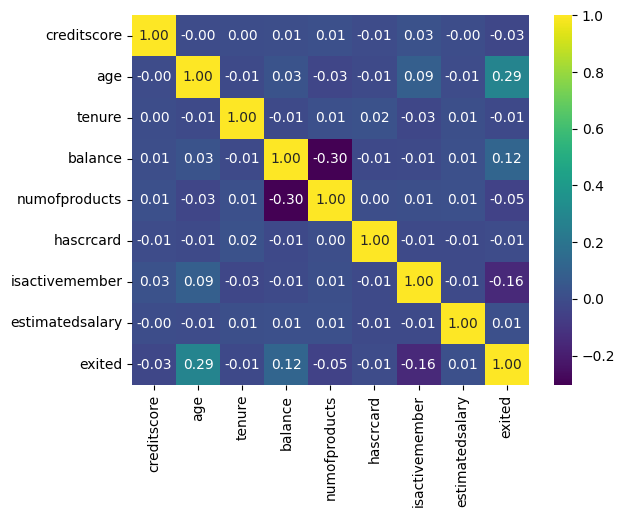

In [208]:
sns.heatmap(df_numerical.corr(),annot=True, cmap='viridis', fmt='.2f')
plt.show()

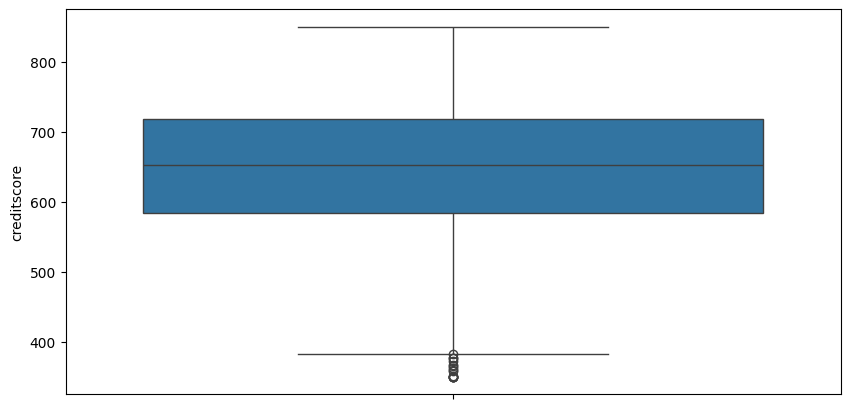

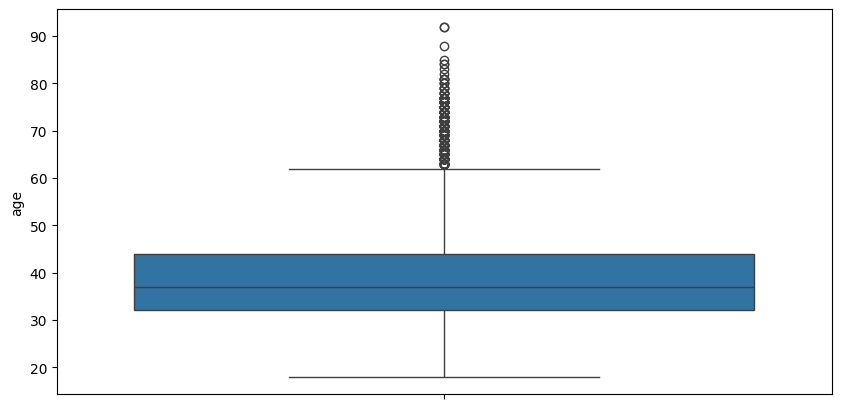

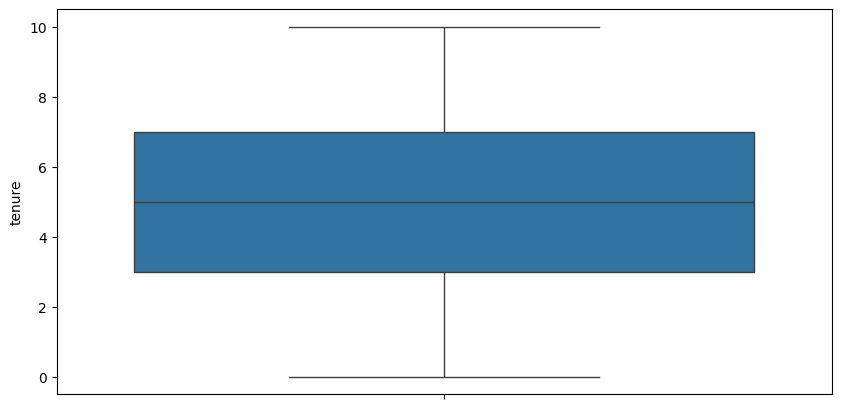

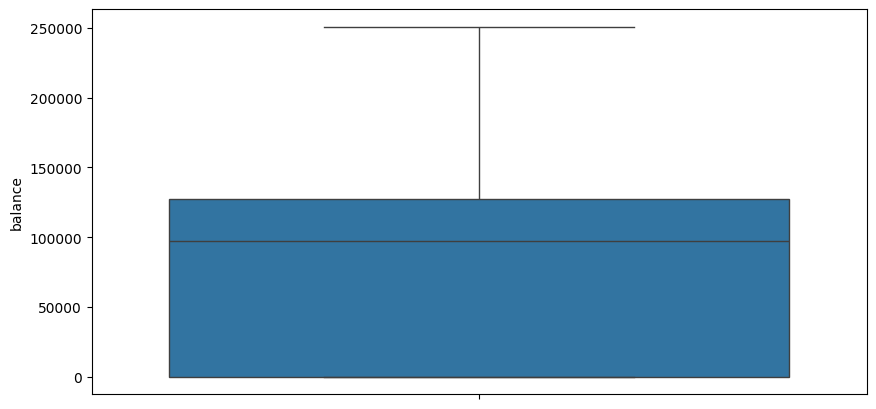

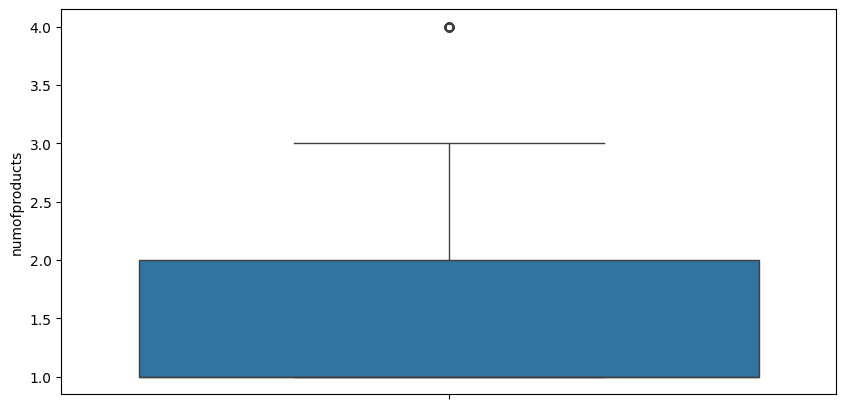

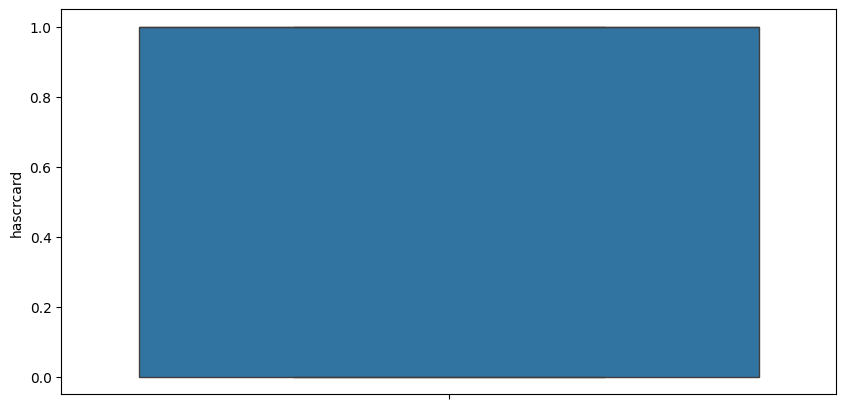

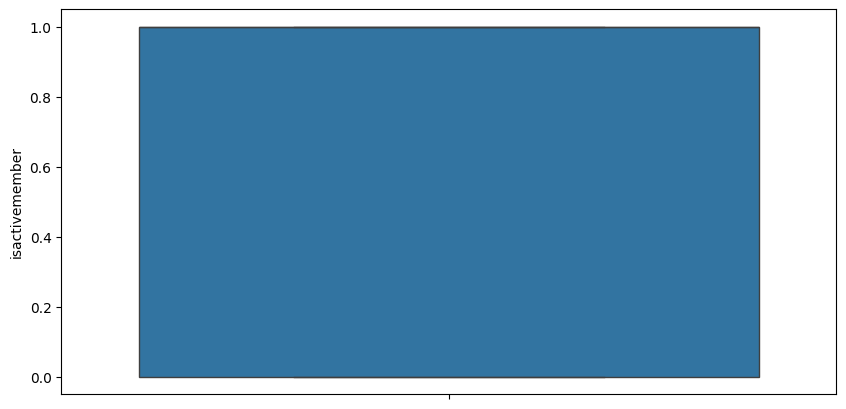

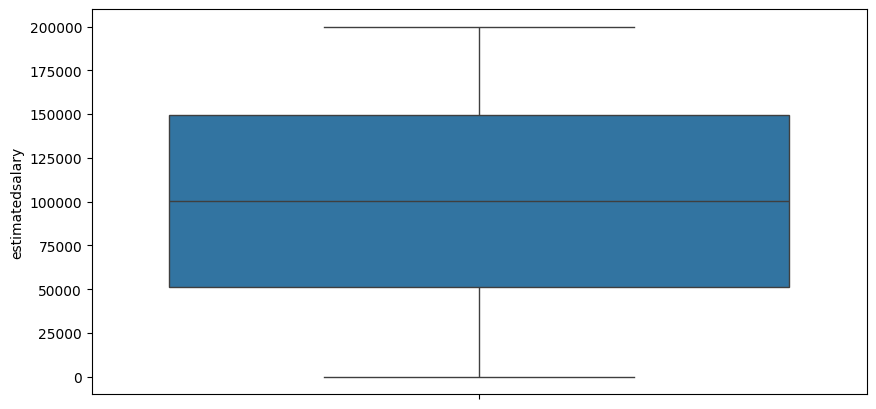

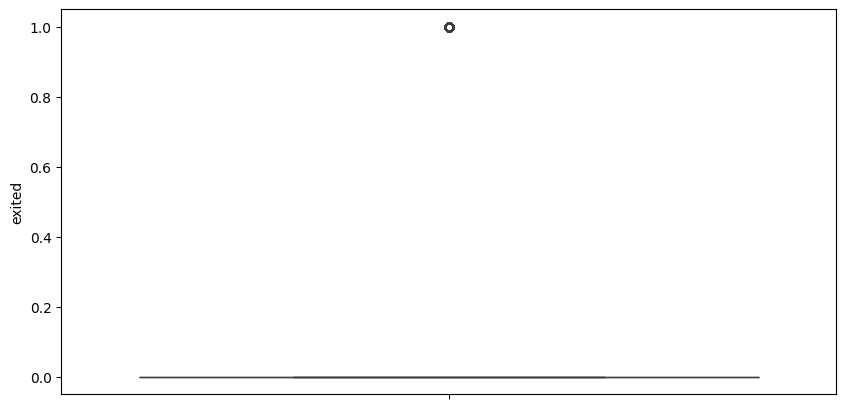

In [209]:
for col in df_numerical.columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(df_numerical[col])
  plt.show()

In [210]:
df_numerical.shape

(10000, 9)

In [211]:
df_numerical.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,42,2,0.000,1,1,1,101348.880,1
1,608,41,1,83807.860,1,0,1,112542.580,0
2,502,42,8,159660.800,3,1,0,113931.570,1
3,699,39,1,0.000,2,0,0,93826.630,0
4,850,43,2,125510.820,1,1,1,79084.100,0


In [212]:
from  sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(df_categorical)
encoded_data = encoder.transform(df_categorical)


In [215]:
encoded_data = encoded_data.toarray()
encoded_data

array([[1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [216]:
df_categorical = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
df_categorical.head()

,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
0,1.000,0.000,0.000,1.000,0.000
1,0.000,0.000,1.000,1.000,0.000
2,1.000,0.000,0.000,1.000,0.000
3,1.000,0.000,0.000,1.000,0.000
4,0.000,0.000,1.000,1.000,0.000


In [218]:
df = pd.concat([df_numerical, df_categorical], axis=1)
df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1.000,0.000,0.000,1.000,0.000
1,608,41,1,83807.860,1,0,1,112542.580,0,0.000,0.000,1.000,1.000,0.000
2,502,42,8,159660.800,3,1,0,113931.570,1,1.000,0.000,0.000,1.000,0.000
3,699,39,1,0.000,2,0,0,93826.630,0,1.000,0.000,0.000,1.000,0.000
4,850,43,2,125510.820,1,1,1,79084.100,0,0.000,0.000,1.000,1.000,0.000


In [ ]:
# prompt: do subplots with scatterplot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from  sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

# ... (Your existing code) ...

# Assuming 'df' is your final DataFrame after preprocessing

# Example subplots with scatterplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1
axes[0, 0].scatter(df['creditscore'], df['estimatedsalary'])
axes[0, 0].set_title('Credit Score vs. Estimated Salary')
axes[0, 0].set_xlabel('Credit Score')
axes[0, 0].set_ylabel('Estimated Salary')

# Plot 2
axes[0, 1].scatter(df['age'], df['balance'])
axes[0, 1].set_title('Age vs. Balance')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Balance')

# Plot 3
axes[1, 0].scatter(df['tenure'], df['numofproducts'])
axes[1, 0].set_title('Tenure vs. Number of Products')
axes[1, 0].set_xlabel('Tenure')
axes[1, 0].set_ylabel('Number of Products')

# Plot 4
axes[1, 1].scatter(df['balance'], df['estimatedsalary'])
axes[1,1].set_title('Balance vs Estimated Salary')
axes[1,1].set_xlabel('Balance')
axes[1,1].set_ylabel('Estimated Salary')

plt.tight_layout()
plt.show()

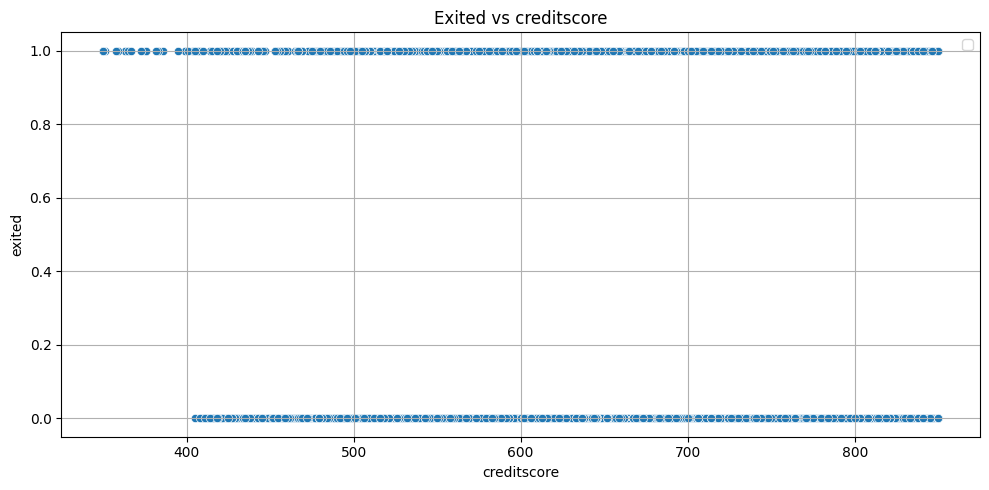

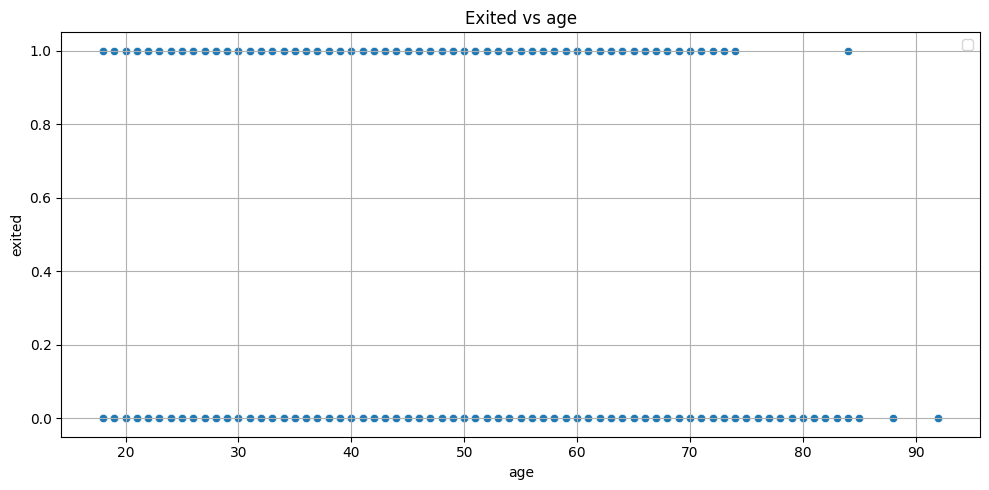

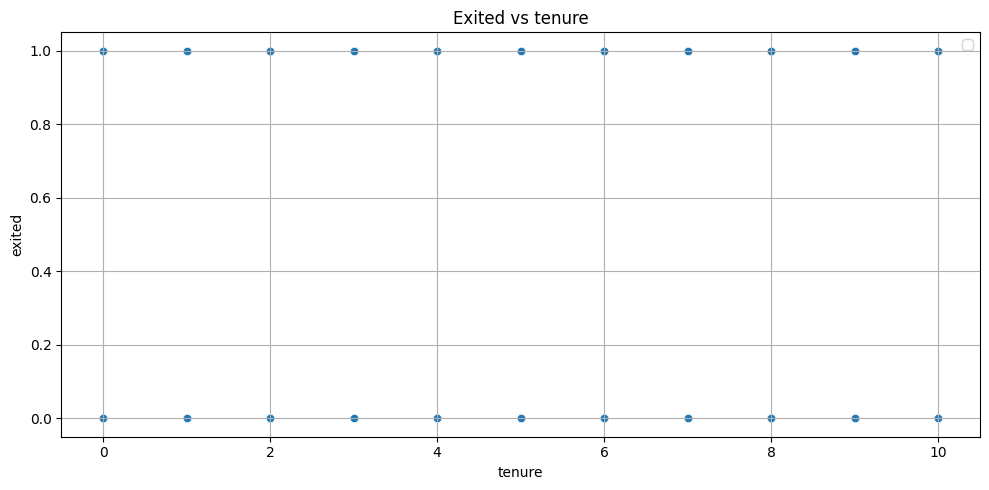

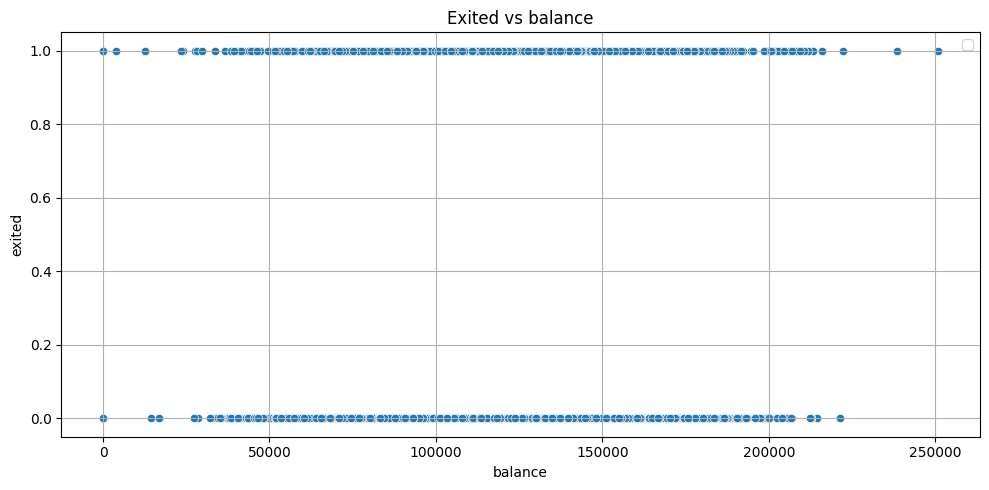

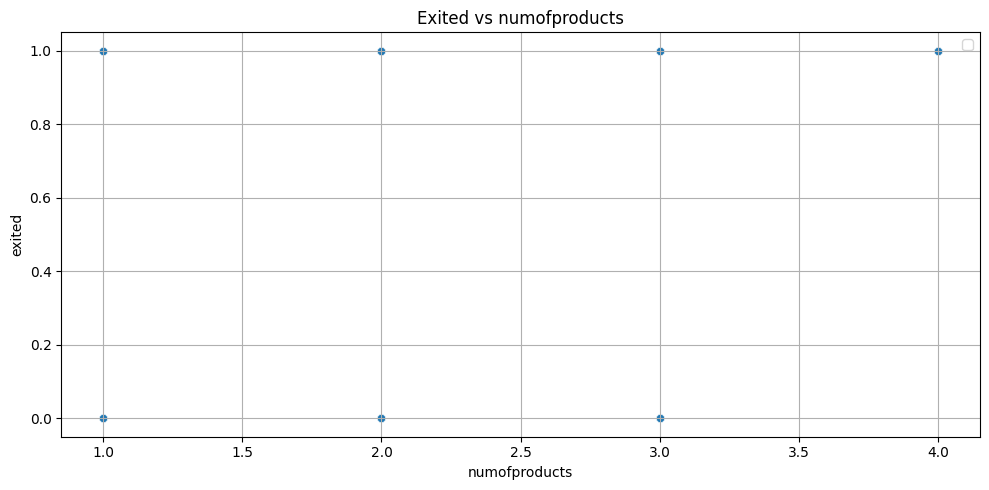

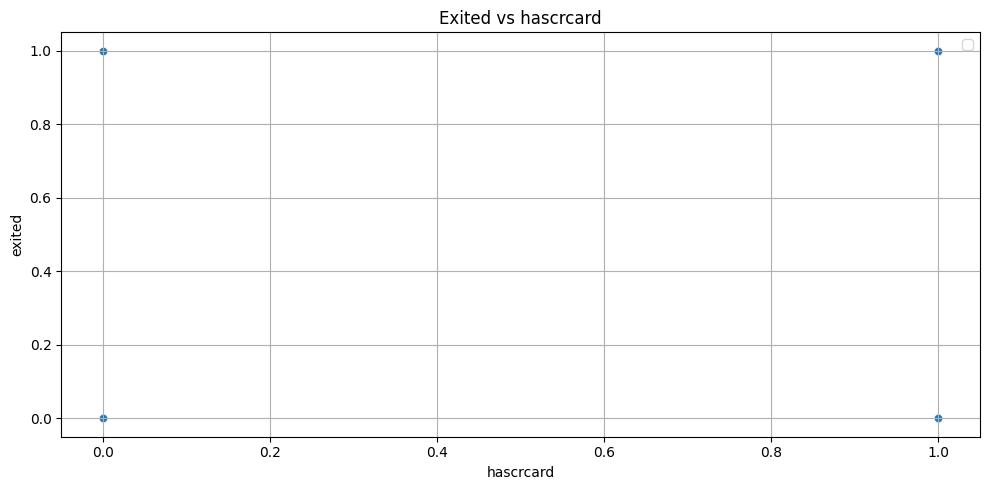

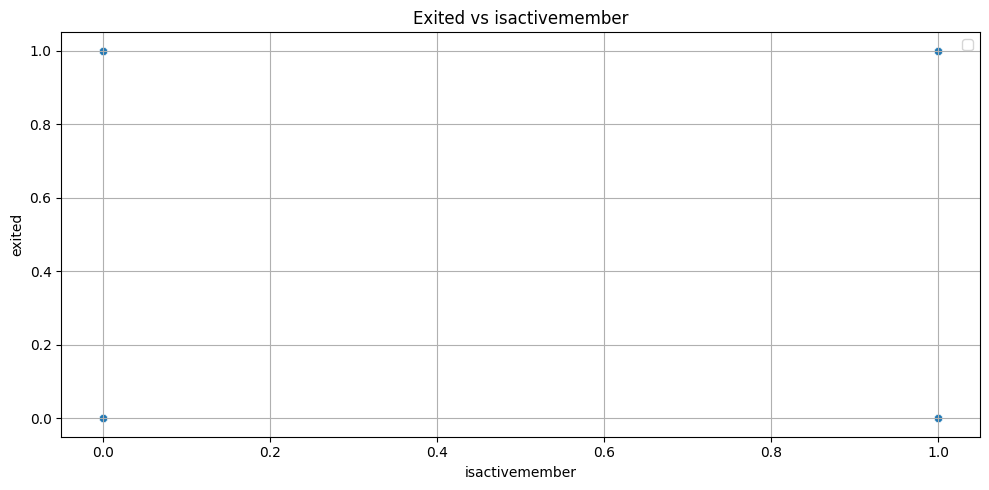

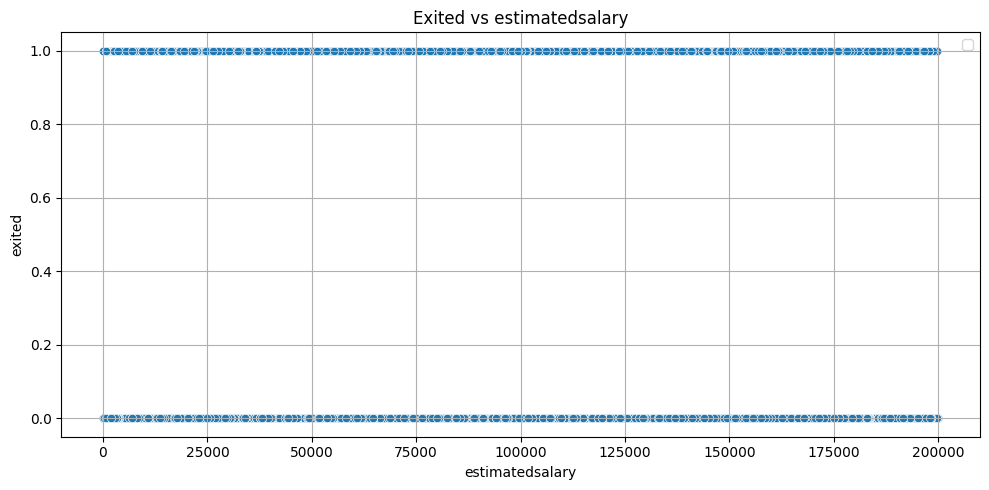

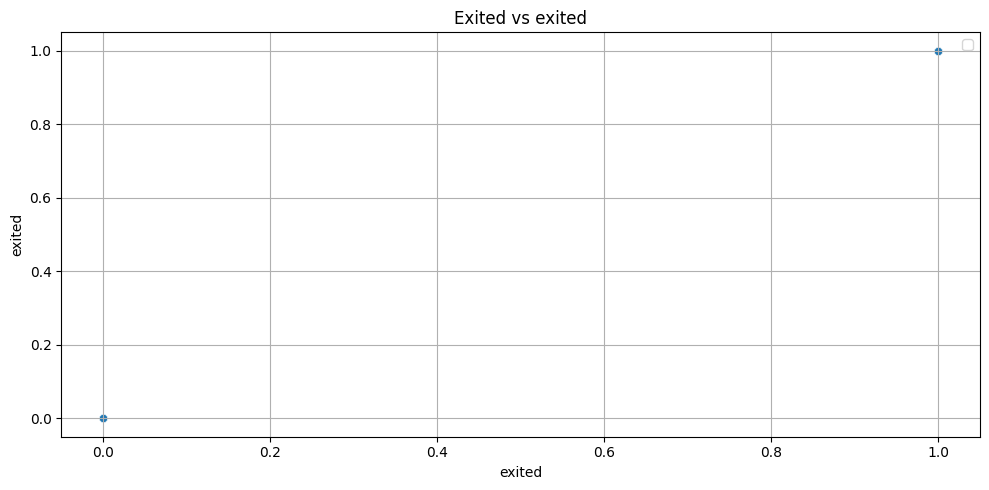

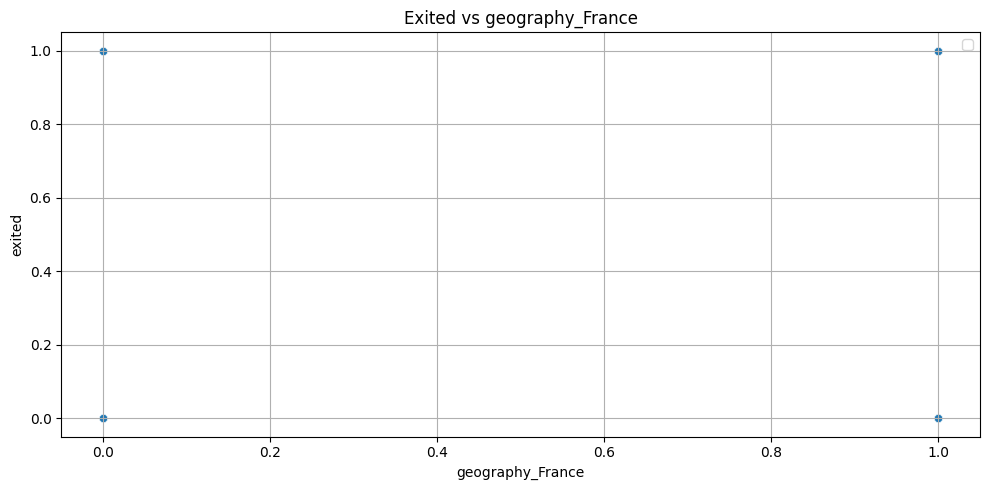

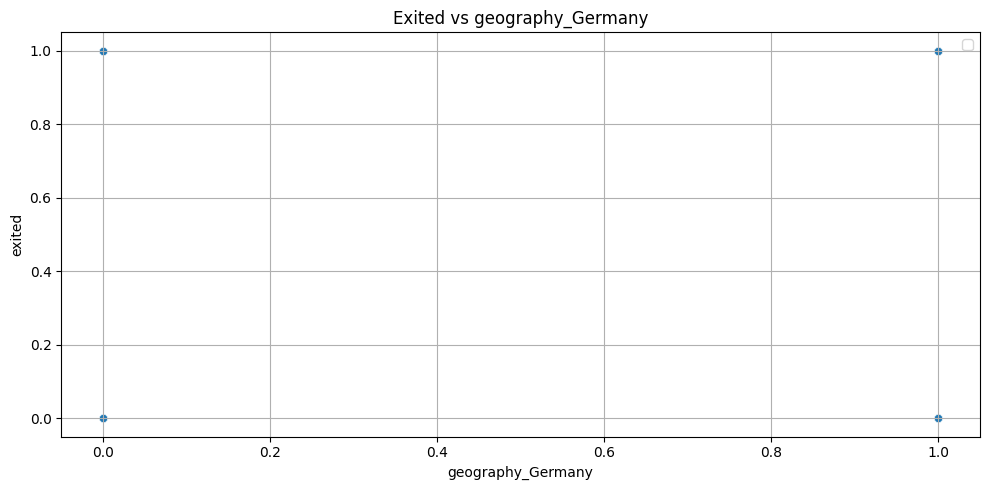

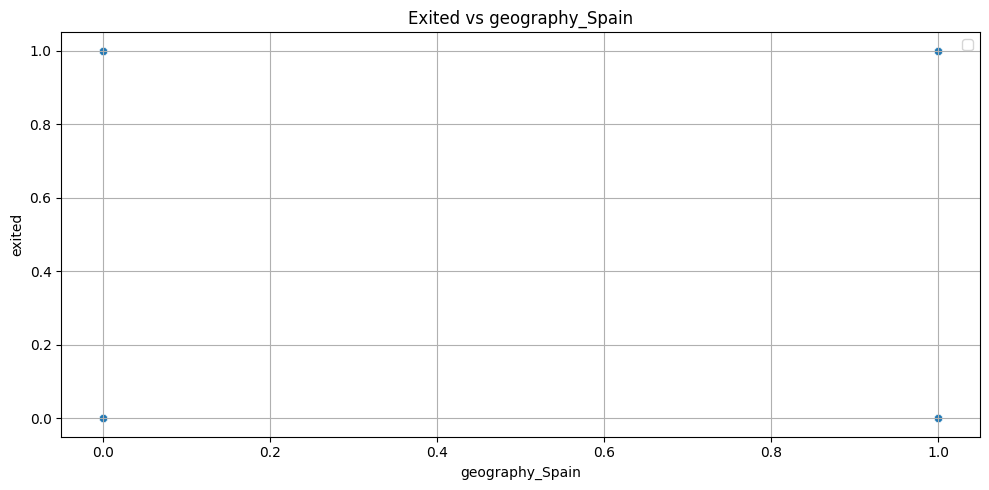

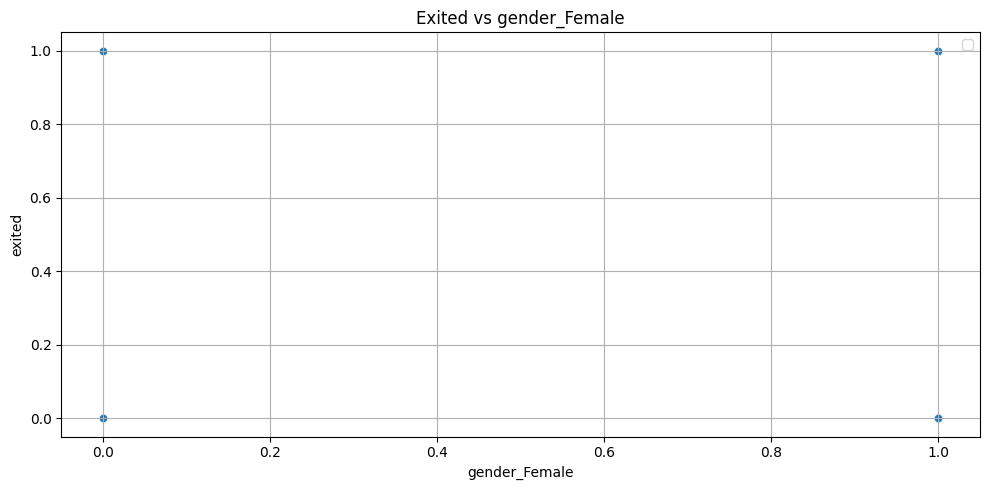

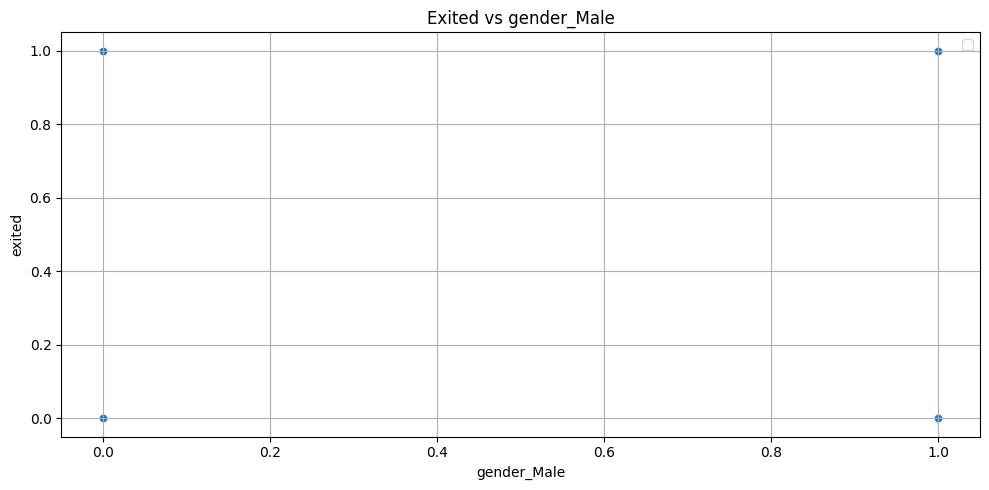

In [224]:
for col in df.columns:
  plt.figure(figsize=(10,5))
  sns.scatterplot(x=col, y='exited', data=df)
  plt.title(f'Exited vs {col}')
  plt.grid()
  plt.legend()
  plt.tight_layout()
  plt.show()

In [225]:
X = df.drop(columns=['exited'])
y = df['exited']

In [228]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [236]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [237]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(8000, 13)
(2000, 13)


In [238]:
X_train_scaled

array([[0.672     , 0.18918919, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.564     , 0.32432432, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.418     , 0.08108108, 0.3       , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.77      , 0.27027027, 0.1       , ..., 0.        , 1.        ,
        0.        ],
       [0.634     , 0.33783784, 0.8       , ..., 0.        , 0.        ,
        1.        ],
       [0.694     , 0.44594595, 0.1       , ..., 0.        , 0.        ,
        1.        ]])

In [239]:
X_test_scaled

array([[0.492     , 0.18918919, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.546     , 0.33783784, 0.1       , ..., 0.        , 0.        ,
        1.        ],
       [0.502     , 0.35135135, 0.4       , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.76      , 0.39189189, 0.7       , ..., 0.        , 1.        ,
        0.        ],
       [0.684     , 0.14864865, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.556     , 0.28378378, 0.1       , ..., 0.        , 0.        ,
        1.        ]])

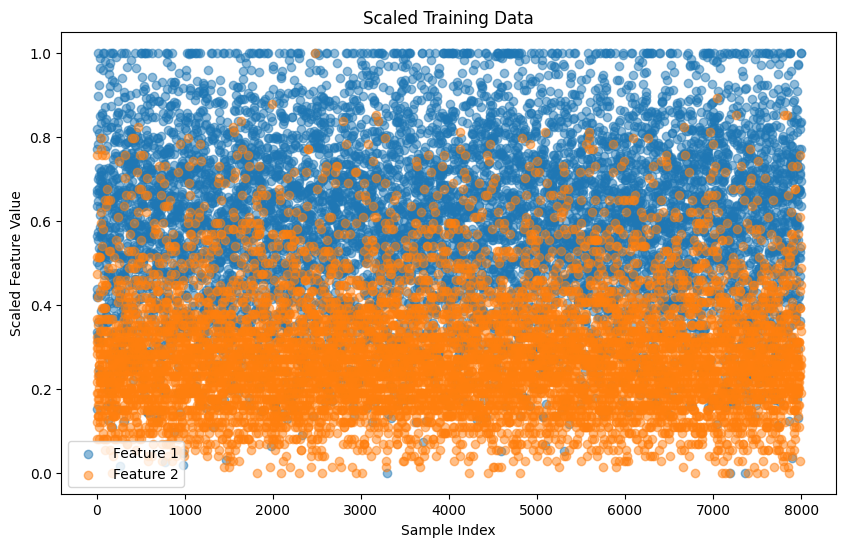

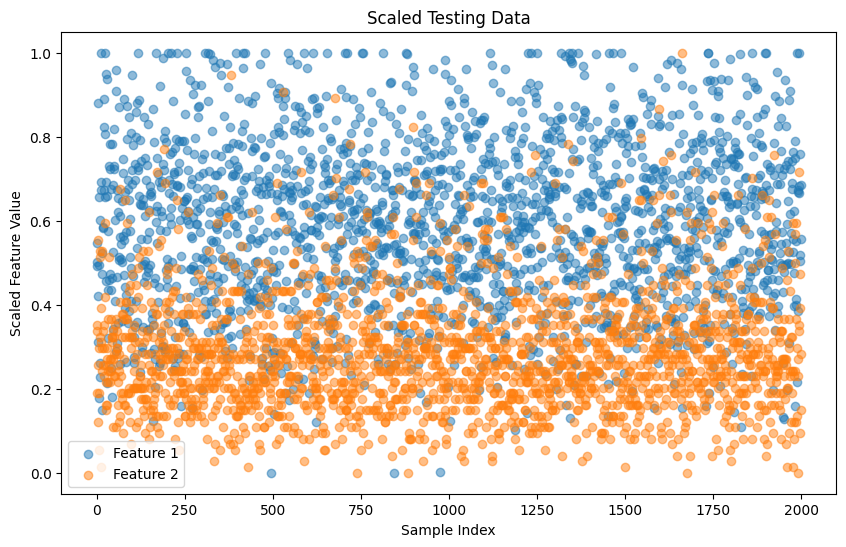

In [241]:
def visualize_data(data, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(data.shape[0]), data[:, 0], label='Feature 1', alpha=0.5)
    plt.scatter(range(data.shape[0]), data[:, 1], label='Feature 2', alpha=0.5)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Scaled Feature Value')
    plt.legend()
    plt.show()

visualize_data(X_train_scaled, 'Scaled Training Data')

visualize_data(X_test_scaled, 'Scaled Testing Data')

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [245]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:,1]

In [246]:
y_pred_proba

array([0.23722152, 0.07866166, 0.31412029, ..., 0.33037627, 0.08418332,
       0.17041104])

In [247]:
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



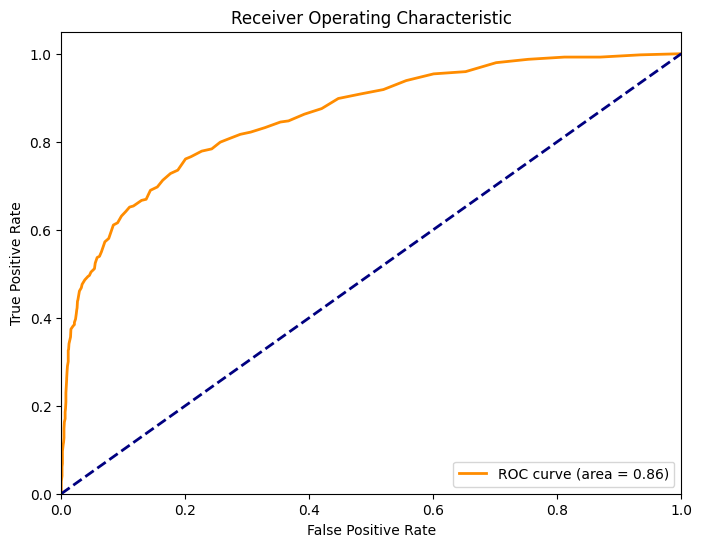

In [267]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

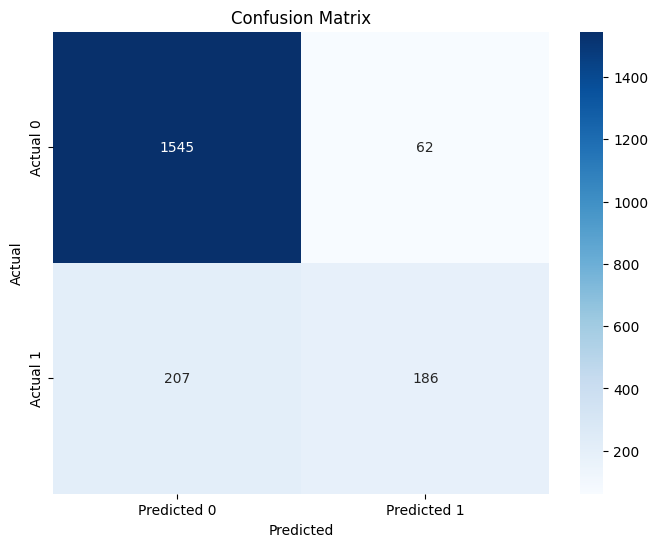

In [268]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [273]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
y_pred_rfc = rfc.predict(X_test_scaled)
y_pred_proba_rfc = rfc.predict_proba(X_test_scaled)[:,1]

In [272]:
report = classification_report(y_test,y_pred_rfc)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



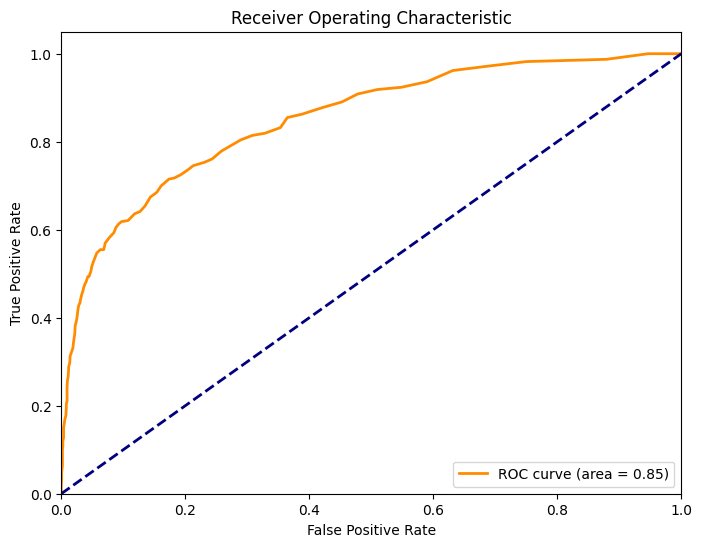

In [274]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rfc)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

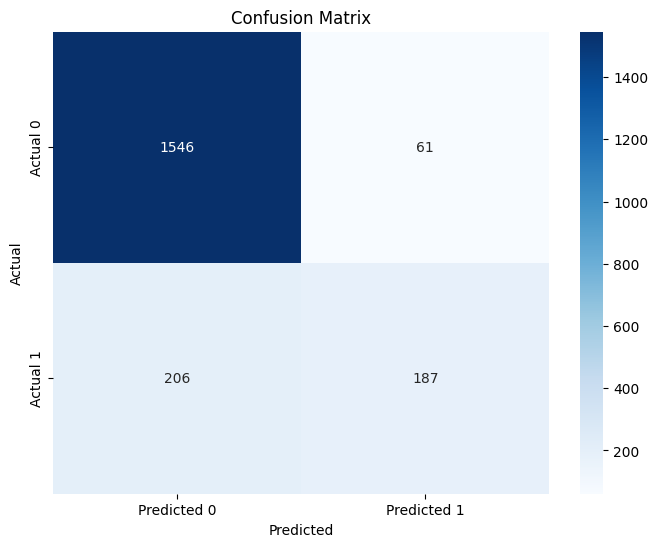

In [275]:
cm = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [251]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
y_pred_dtc = dtc.predict(X_test_scaled)
y_pred_proba_dtc = dtc.predict_proba(X_test_scaled)[:,1]

In [252]:
y_pred_proba_dtc

array([1., 0., 0., ..., 0., 0., 1.])

In [253]:
report = classification_report(y_test,y_pred_dtc)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.50      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.79      0.79      0.79      2000



In [254]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

In [255]:
report = classification_report(y_test,y_pred_xgb)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [256]:
cm = confusion_matrix(y_test,y_pred_xgb)
cm

array([[1523,   84],
       [ 191,  202]])

In [257]:
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
cm_rfc

array([[1553,   54],
       [ 206,  187]])

In [260]:
param_grid = ({
    'n_estimators' : [100,200,300],
    'max_depth' : [None,10,20,30],
    'min_samples_split' :[2,5,10],
    'min_samples_leaf' : [1,2,4]
})

rfc_tuned = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc_tuned,param_grid=param_grid,cv=5, scoring='accuracy', verbose=2, n_jobs=1)
grid_search.fit(X_train_scaled,y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END m

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [261]:
best_params = grid_search.best_params_
best_params

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [262]:
best_score = grid_search.best_score_
best_score


0.865

In [263]:
best_estimator = grid_search.best_estimator_
best_estimator

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, random_state=42)

In [264]:


!pip install optuna

import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 500)
    max_depth = trial.suggest_int("max_depth", 5, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    accuracy = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Best trial:")
trial = study.best_trial

print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

best_rf_model = RandomForestClassifier(**trial.params, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

y_pred_optuna = best_rf_model.predict(X_test_scaled)
report = classification_report(y_test, y_pred_optuna)
report

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00


[I 2025-01-30 15:30:47,534] A new study created in memory with name: no-name-43bf93d0-2f1c-4c9a-b463-a72b0b1d225a
[I 2025-01-30 15:31:12,865] Trial 0 finished with value: 0.8625 and parameters: {'n_estimators': 458, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8625.
[I 2025-01-30 15:31:36,851] Trial 1 finished with value: 0.8632500000000001 and parameters: {'n_estimators': 460, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.8632500000000001.
[I 2025-01-30 15:31:51,555] Trial 2 finished with value: 0.8620000000000001 and parameters: {'n_estimators': 325, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.8632500000000001.
[I 2025-01-30 15:32:00,796] Trial 3 finished with value: 0.8616249999999999 and parameters: {'n_estimators': 178, 'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.8632500000000001.
[I

Best trial:
  Value: 0.865625
  Params: 
    n_estimators: 484
    max_depth: 29
    min_samples_split: 9
    min_samples_leaf: 1


'              precision    recall  f1-score   support\n\n           0       0.88      0.96      0.92      1607\n           1       0.76      0.46      0.57       393\n\n    accuracy                           0.86      2000\n   macro avg       0.82      0.71      0.75      2000\nweighted avg       0.85      0.86      0.85      2000\n'

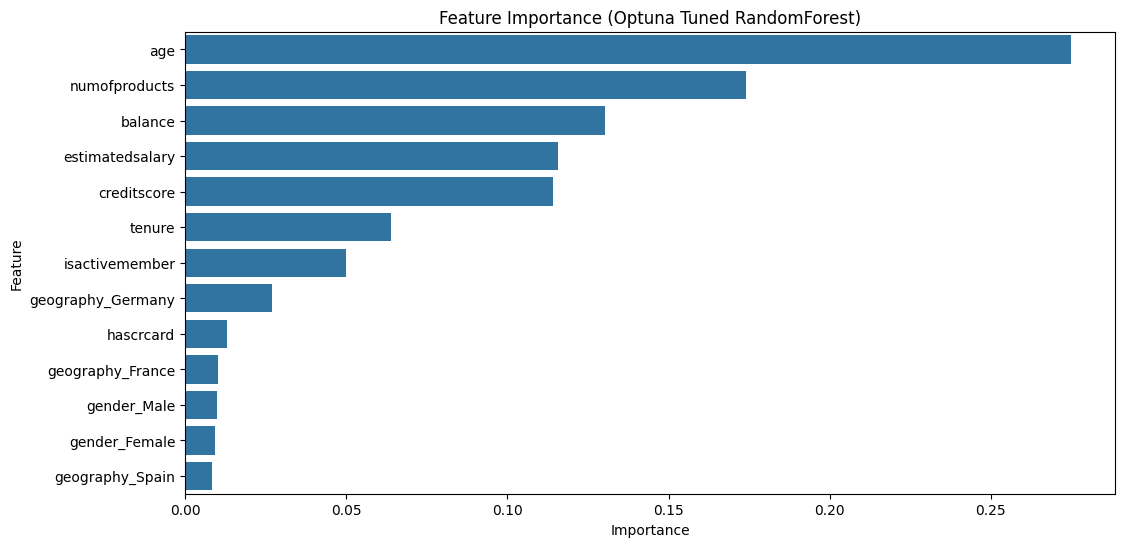

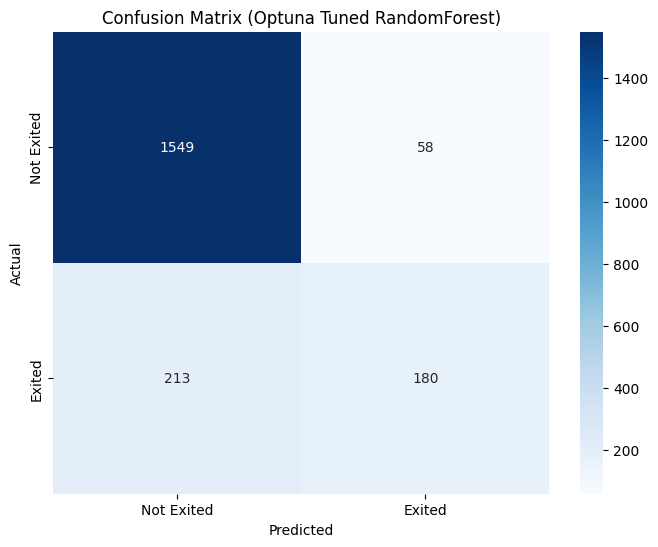

In [266]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = best_rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Optuna Tuned RandomForest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Confusion Matrix Heatmap for the best Optuna model
cm_optuna = confusion_matrix(y_test, y_pred_optuna)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_optuna, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix (Optuna Tuned RandomForest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()